# **FIRST ATTEMPT**

In [0]:
%matplotlib inline
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

Let's load the train and test set:

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

sample_submission = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/sample_submission.csv")


You will fit a model on the trainset and make predictions on the testset. 

To submit these predictions to Kaggle you need to write a .csv file with two columns: 
- `index` that matches the `index` column in the test set.
- `label` which is your prediction.

Here is an example predictions file for Kaggle:

In [0]:
sample_submission.head(10)

,index,label
0,0,0.168801
1,1,0.124169
2,2,0.947757
3,3,0.069585
4,4,0.635325
5,5,0.659027
6,6,0.653697
7,7,0.850030
8,8,0.160489
9,9,0.843272


Make sure to save your results without the extra Pandas index column that is written by default:

In [0]:
y_train = trainset.pop('label')
X_train = trainset
X_test = testset.iloc[:,:14]

print(X_train.head())
print(X_test.head())
print(y_train)

       AF3       F7       F3      FC5  ...      FC6       F4       F8      AF4
0  4299.49  3997.44  4277.95  4116.92  ...  4211.79  4278.97  4600.00  4369.23
1  4302.05  3985.64  4261.03  4129.74  ...  4195.90  4283.08  4607.18  4358.46
2  4321.03  4015.90  4265.13  4122.56  ...  4155.38  4286.15  4608.21  4371.79
3  4408.21  4104.10  4380.00  4232.31  ...  4319.49  4388.21  4715.90  4464.10
4  4347.18  3975.38  4266.67  4102.56  ...  4248.21  4313.33  4664.10  4411.79

[5 rows x 14 columns]
       AF3       F7       F3      FC5  ...      FC6       F4       F8      AF4
0  4296.41  4040.51  4253.33  4124.10  ...  4197.44  4268.72  4598.46  4342.56
1  4291.28  3994.36  4247.18  4102.56  ...  4190.77  4260.51  4593.33  4337.95
2  4299.49  4019.49  4269.74  4116.41  ...  4202.56  4280.51  4596.92  4350.26
3  4280.00  4004.62  4263.59  4120.51  ...  4192.82  4271.79  4608.72  4344.10
4  4317.44  3968.72  4260.51  4101.54  ...  4199.49  4282.05  4592.31  4372.82

[5 rows x 14 columns]
0     

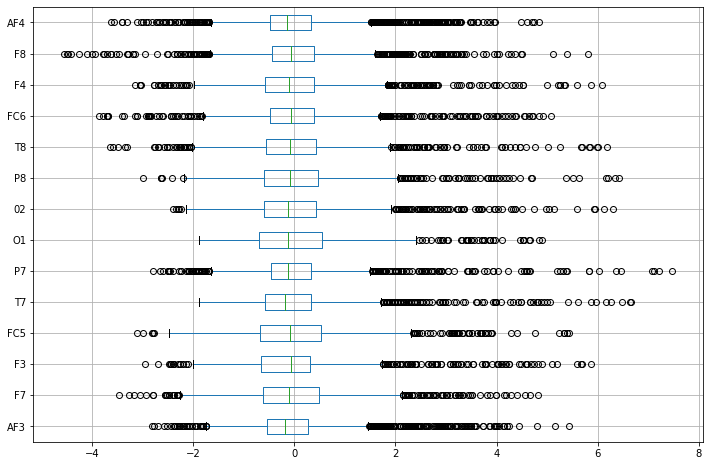

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train_stand = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns.values)

plt.figure(figsize=(12,8))
X_train_stand.boxplot(vert=False)
plt.show()

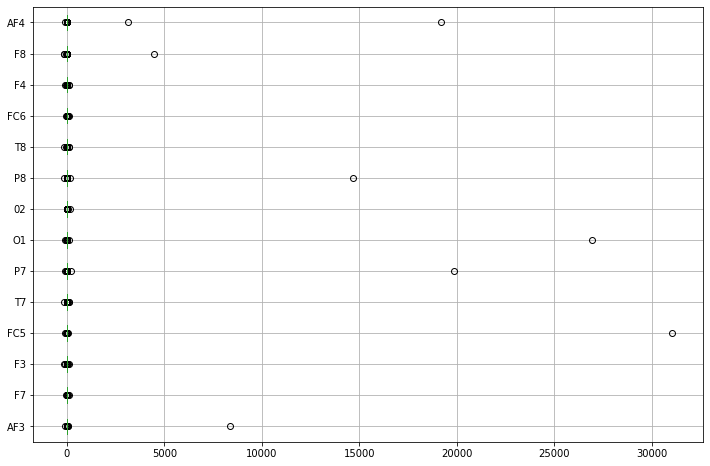

In [0]:
X_test_stand = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.values)

plt.figure(figsize=(12,8))
X_test_stand.boxplot(vert=False)
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
score_auc = cross_val_score(model, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.6606449421569776


In [0]:
model.fit(X_train_stand, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = model.predict(X_test_stand)
predictions

array([0.23577642, 0.36954037, 0.32687736, ..., 0.47242786, 0.60940983,
       0.42265953])

In [0]:
results = pd.DataFrame()
results['index'] = testset['index']
results['label'] = predictions
results

,index,label
0,0,0.235776
1,1,0.369540
2,2,0.326877
3,3,0.395776
4,4,0.854611
...,...,...
12887,12887,0.465054
12888,12888,0.544708
12889,12889,0.472428
12890,12890,0.609410


# **SECOND ATTEMPT (became third attempt)**

See third attempt. This one used SCV with 'poly' kernel and no removal of outliers

# **THIRD ATTEMPT (StandardScaler) and FOURTH ATTEMPT (MinMaxScaler)**

SCV with 'rbf' kernel and removed outliers (more than 4*stdev) and optimized C

In [0]:
%matplotlib inline
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;

trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

X_test = testset.iloc[:,:14]

In [0]:
from numpy import mean
from numpy import std
from numpy import delete

data = trainset
values = data.values

for i in range(values.shape[1] - 1):
  data_mean = values[:,i].mean()
  data_std = values[:,i].std()
  cut_off = data_std * 4
  lower = data_mean - cut_off
  upper = data_mean + cut_off
  too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
  values = delete(values, too_small, 0)
  too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
  values = delete(values, too_large, 0)
 
trainset_nooutliers = pd.DataFrame(values, columns=data.columns)
trainset_nooutliers

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4,label
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23,1.0
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46,0.0
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79,0.0
3,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79,1.0
4,4292.82,4007.18,4275.38,4120.00,4336.92,4620.51,4059.49,4614.36,4194.87,4229.23,4158.46,4270.26,4600.51,4353.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,4211.79,4015.90,4230.26,4107.69,4336.41,4623.08,4071.79,4605.64,4187.69,4225.13,4168.72,4240.51,4544.62,4265.13,1.0
1897,4268.72,4035.38,4237.95,4112.82,4346.15,4618.97,4066.15,4603.08,4192.82,4214.36,4189.74,4250.77,4586.67,4321.54,0.0
1898,4287.69,4007.69,4267.18,4128.21,4339.49,4611.28,4036.92,4603.59,4181.54,4228.21,4192.82,4260.51,4597.44,4353.33,0.0
1899,4297.95,4031.79,4275.90,4147.69,4365.64,4632.82,4093.33,4666.15,4211.79,4228.21,4210.77,4279.49,4604.10,4340.51,0.0


In [0]:
y_train_nooutliers = trainset_nooutliers.pop('label')
X_train_nooutliers = trainset_nooutliers

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_stand_nooutliers = pd.DataFrame(scaler.fit_transform(X_train_nooutliers),columns=X_train_nooutliers.columns.values)
X_test_stand = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.values)

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(C=70, probability=True)
score_auc = cross_val_score(model, X_train_stand_nooutliers, y_train_nooutliers, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.961748148454373


In [0]:
from sklearn.model_selection import GridSearchCV

search_space = range(65,75)           
params = dict(C=search_space)
grid_search = GridSearchCV(model, param_grid=params, iid=False)

grid_search.fit(X_train_stand_nooutliers, y_train_nooutliers)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean_score, std * 2, params))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


0.898 (+/-0.034) for {'C': 65}
0.899 (+/-0.032) for {'C': 66}
0.898 (+/-0.031) for {'C': 67}
0.898 (+/-0.030) for {'C': 68}
0.898 (+/-0.030) for {'C': 69}
0.900 (+/-0.032) for {'C': 70}
0.900 (+/-0.032) for {'C': 71}
0.899 (+/-0.033) for {'C': 72}
0.899 (+/-0.036) for {'C': 73}
0.899 (+/-0.036) for {'C': 74}


In [0]:
model = SVC(C=70, probability=True)
model.fit(X_train_stand_nooutliers, y_train_nooutliers)

SVC(C=70, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
predictions = model.predict_proba(X_test_stand)
predictions

array([[9.99995515e-01, 4.48470503e-06],
       [2.35529103e-01, 7.64470897e-01],
       [9.95666478e-01, 4.33352199e-03],
       ...,
       [1.67849667e-06, 9.99998322e-01],
       [2.12801867e-01, 7.87198133e-01],
       [9.77765634e-01, 2.22343657e-02]])

In [0]:
results = pd.DataFrame()
results['index'] = testset['index']
results['label'] = predictions[:,1]
results

,index,label
0,0,0.000004
1,1,0.764471
2,2,0.004334
3,3,1.000000
4,4,1.000000
...,...,...
12887,12887,0.071083
12888,12888,0.996021
12889,12889,0.999998
12890,12890,0.787198


In [0]:
filename = "my_prediction_results.csv"

#make sure to not write the Pandas index column (index=False)
results.to_csv(filename,index=False)

# **FIFTH ATTEMPT (optimize C and gamma)**

NIET INGEDIEND

In [0]:
%matplotlib inline
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;

trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

X_test = testset.iloc[:,:14]

In [0]:
from numpy import mean
from numpy import std
from numpy import delete

data = trainset
values = data.values

for i in range(values.shape[1] - 1):
  data_mean = values[:,i].mean()
  data_std = values[:,i].std()
  cut_off = data_std * 4
  lower = data_mean - cut_off
  upper = data_mean + cut_off
  too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
  values = delete(values, too_small, 0)
  too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
  values = delete(values, too_large, 0)
 
trainset_nooutliers = pd.DataFrame(values, columns=data.columns)
trainset_nooutliers

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4,label
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23,1.0
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46,0.0
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79,0.0
3,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79,1.0
4,4292.82,4007.18,4275.38,4120.00,4336.92,4620.51,4059.49,4614.36,4194.87,4229.23,4158.46,4270.26,4600.51,4353.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,4211.79,4015.90,4230.26,4107.69,4336.41,4623.08,4071.79,4605.64,4187.69,4225.13,4168.72,4240.51,4544.62,4265.13,1.0
1897,4268.72,4035.38,4237.95,4112.82,4346.15,4618.97,4066.15,4603.08,4192.82,4214.36,4189.74,4250.77,4586.67,4321.54,0.0
1898,4287.69,4007.69,4267.18,4128.21,4339.49,4611.28,4036.92,4603.59,4181.54,4228.21,4192.82,4260.51,4597.44,4353.33,0.0
1899,4297.95,4031.79,4275.90,4147.69,4365.64,4632.82,4093.33,4666.15,4211.79,4228.21,4210.77,4279.49,4604.10,4340.51,0.0


In [0]:
y_train_nooutliers = trainset_nooutliers.pop('label')
X_train_nooutliers = trainset_nooutliers

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_stand_nooutliers = pd.DataFrame(scaler.fit_transform(X_train_nooutliers),columns=X_train_nooutliers.columns.values)
X_test_stand = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.values)

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(C=10, gamma=23, probability=True)
score_auc = cross_val_score(model, X_train_stand_nooutliers, y_train_nooutliers, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.9621555611511152


In [0]:
from sklearn.model_selection import GridSearchCV

search_space = [1,10,50,70,100,120]
search_gamma = [1,10,23,30,40,50]             
params = dict(C=search_space, gamma=search_gamma)
grid_search = GridSearchCV(model, param_grid=params, iid=False)

grid_search.fit(X_train_stand_nooutliers, y_train_nooutliers)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean_score, std * 2, params))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


0.746 (+/-0.022) for {'C': 1, 'gamma': 1}
0.885 (+/-0.056) for {'C': 1, 'gamma': 10}
0.892 (+/-0.038) for {'C': 1, 'gamma': 23}
0.893 (+/-0.034) for {'C': 1, 'gamma': 30}
0.885 (+/-0.019) for {'C': 1, 'gamma': 40}
0.875 (+/-0.016) for {'C': 1, 'gamma': 50}
0.823 (+/-0.039) for {'C': 10, 'gamma': 1}
0.898 (+/-0.023) for {'C': 10, 'gamma': 10}
0.903 (+/-0.019) for {'C': 10, 'gamma': 23}
0.900 (+/-0.026) for {'C': 10, 'gamma': 30}
0.888 (+/-0.022) for {'C': 10, 'gamma': 40}
0.882 (+/-0.017) for {'C': 10, 'gamma': 50}
0.862 (+/-0.031) for {'C': 50, 'gamma': 1}
0.893 (+/-0.037) for {'C': 50, 'gamma': 10}
0.903 (+/-0.014) for {'C': 50, 'gamma': 23}
0.900 (+/-0.026) for {'C': 50, 'gamma': 30}
0.888 (+/-0.022) for {'C': 50, 'gamma': 40}
0.882 (+/-0.017) for {'C': 50, 'gamma': 50}
0.864 (+/-0.037) for {'C': 70, 'gamma': 1}
0.889 (+/-0.036) for {'C': 70, 'gamma': 10}
0.903 (+/-0.014) for {'C': 70, 'gamma': 23}
0.900 (+/-0.026) for {'C': 70, 'gamma': 30}
0.888 (+/-0.022) for {'C': 70, 'gamma': 40

In [0]:
model = SVC(C=10, gamma=23, probability=True)
model.fit(X_train_stand_nooutliers, y_train_nooutliers)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=23, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
predictions = model.predict_proba(X_test_stand)
predictions

array([[0.99806157, 0.00193843],
       [0.69979615, 0.30020385],
       [0.97524662, 0.02475338],
       ...,
       [0.09381769, 0.90618231],
       [0.07934473, 0.92065527],
       [0.98310969, 0.01689031]])

In [0]:
results = pd.DataFrame()
results['index'] = testset['index']
results['label'] = predictions[:,1]
results

,index,label
0,0,0.001938
1,1,0.300204
2,2,0.024753
3,3,0.994595
4,4,0.975554
...,...,...
12887,12887,0.139322
12888,12888,0.981455
12889,12889,0.906182
12890,12890,0.920655


In [0]:
filename = "my_prediction_results.csv"

#make sure to not write the Pandas index column (index=False)
results.to_csv(filename,index=False)

# **SIXTH ATTEMPT**

Same as fifth, but with no outliers removed (better auc)

In [1]:
%matplotlib inline
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;

trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

X_test = testset.iloc[:,:14]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
y_train = trainset.pop('label')
X_train = trainset

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train_stand = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns.values)
X_test_stand = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.values)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(C=10, gamma=23, probability=True)
score_auc = cross_val_score(model, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.9224246278695819


In [13]:
from sklearn.model_selection import GridSearchCV

search_space = [8,9,10,11,12]
search_gamma = [0.8,0.9,1,2,3]             
params = dict(C=search_space, gamma=search_gamma)
grid_search = GridSearchCV(model, param_grid=params, iid=False)

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean_score, std * 2, params))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


0.908 (+/-0.029) for {'C': 8, 'gamma': 0.8}
0.909 (+/-0.029) for {'C': 8, 'gamma': 0.9}
0.908 (+/-0.026) for {'C': 8, 'gamma': 1}
0.851 (+/-0.019) for {'C': 8, 'gamma': 2}
0.764 (+/-0.024) for {'C': 8, 'gamma': 3}
0.908 (+/-0.030) for {'C': 9, 'gamma': 0.8}
0.909 (+/-0.029) for {'C': 9, 'gamma': 0.9}
0.908 (+/-0.026) for {'C': 9, 'gamma': 1}
0.851 (+/-0.019) for {'C': 9, 'gamma': 2}
0.764 (+/-0.024) for {'C': 9, 'gamma': 3}
0.908 (+/-0.030) for {'C': 10, 'gamma': 0.8}
0.909 (+/-0.029) for {'C': 10, 'gamma': 0.9}
0.908 (+/-0.026) for {'C': 10, 'gamma': 1}
0.851 (+/-0.019) for {'C': 10, 'gamma': 2}
0.764 (+/-0.024) for {'C': 10, 'gamma': 3}
0.908 (+/-0.030) for {'C': 11, 'gamma': 0.8}
0.909 (+/-0.029) for {'C': 11, 'gamma': 0.9}
0.908 (+/-0.026) for {'C': 11, 'gamma': 1}
0.851 (+/-0.019) for {'C': 11, 'gamma': 2}
0.764 (+/-0.024) for {'C': 11, 'gamma': 3}
0.908 (+/-0.030) for {'C': 12, 'gamma': 0.8}
0.909 (+/-0.029) for {'C': 12, 'gamma': 0.9}
0.908 (+/-0.026) for {'C': 12, 'gamma': 1}
0

In [5]:
model = SVC(C=10, gamma=23, probability=True)
model.fit(X_train_stand, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=23, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [6]:
predictions = model.predict_proba(X_test_stand)
predictions

array([[9.99978110e-01, 2.18895409e-05],
       [2.91682150e-01, 7.08317850e-01],
       [9.97286871e-01, 2.71312909e-03],
       ...,
       [3.47811074e-06, 9.99996522e-01],
       [9.11035082e-02, 9.08896492e-01],
       [9.60226371e-01, 3.97736288e-02]])

In [7]:
results = pd.DataFrame()
results['index'] = testset['index']
results['label'] = predictions[:,1]
results

,index,label
0,0,0.000022
1,1,0.708318
2,2,0.002713
3,3,1.000000
4,4,1.000000
...,...,...
12887,12887,0.170815
12888,12888,0.996937
12889,12889,0.999997
12890,12890,0.908896


In [0]:
filename = "my_prediction_results.csv"

#make sure to not write the Pandas index column (index=False)
results.to_csv(filename,index=False)

# **SEVENTH ATTEMPT**

In [0]:
%matplotlib inline
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;

trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

X_test = testset.iloc[:,:14]

In [0]:
y_train = trainset.pop('label')
X_train = trainset

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train_stand = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns.values)
X_test_stand = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.values)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

bdt = AdaBoostClassifier(n_estimators=50)
score_auc = cross_val_score(bdt, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.8105964886285987


In [42]:
from sklearn.model_selection import GridSearchCV

search_space = [10,50,100,500]
search_gamma = [0.8,0.9,1,2,3]             
params = dict(n_estimators=search_space)
grid_search = GridSearchCV(bdt, param_grid=params, iid=False)

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean_score, std * 2, params))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


0.703 (+/-0.037) for {'n_estimators': 10}
0.749 (+/-0.029) for {'n_estimators': 50}
0.760 (+/-0.020) for {'n_estimators': 100}
0.742 (+/-0.034) for {'n_estimators': 500}


# **Some extra info**

In [0]:
%matplotlib inline
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;

trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

y_train = trainset.pop('label')
X_train = trainset
X_test = testset

In [14]:
len(trainset) - trainset.count()

AF3    0
F7     0
F3     0
FC5    0
T7     0
P7     0
O1     0
02     0
P8     0
T8     0
FC6    0
F4     0
F8     0
AF4    0
dtype: int64

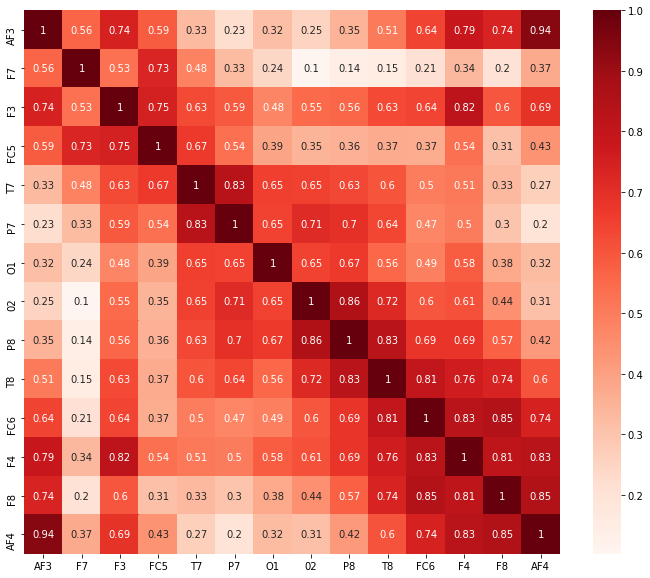

In [15]:
plt.figure(figsize=(12,10))
corr = trainset.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV

trainset2 = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
y = trainset2.pop('label')
x = trainset2
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.042513
Best score using built-in LassoCV: 0.088113


Text(0.5, 1.0, 'Feature importance using Lasso Model')

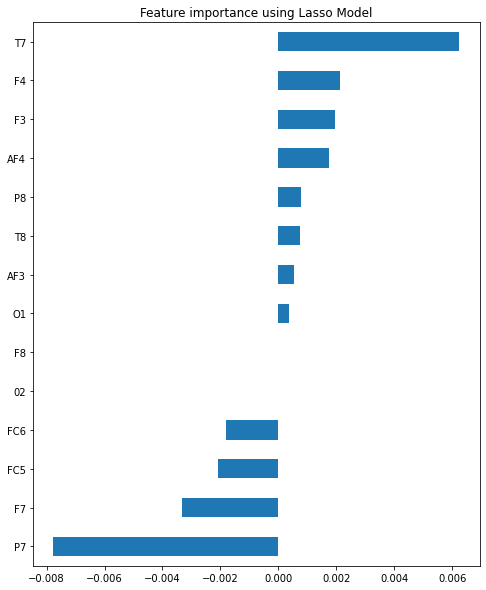

In [17]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_pca = pca.fit_transform(X_train)
train_pca_df = pd.DataFrame(train_pca, columns=['PC1', 'PC2'])
print(train_pca_df)
print(y_train)

             PC1         PC2
0      12.408407   19.690757
1     -11.879966  -15.478519
2       0.136056  -34.760012
3     373.508372  164.582414
4      86.937650   -9.299290
...          ...         ...
1995 -141.412180   45.028574
1996  -59.138070    1.314678
1997  -29.267815  -22.544317
1998   20.676037   46.896765
1999   18.193672    8.065968

[2000 rows x 2 columns]
0       1
1       0
2       0
3       0
4       1
       ..
1995    1
1996    0
1997    0
1998    0
1999    0
Name: label, Length: 2000, dtype: int64


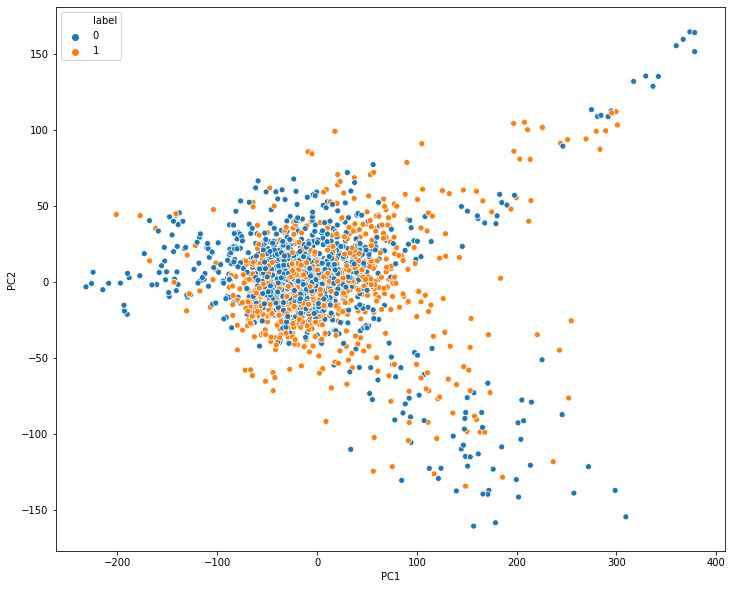

In [19]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=train_pca_df)
plt.show()

In [0]:
from sklearn.svm import SVC

model = SVC(C=10, gamma=23, probability=True)
model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=23, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

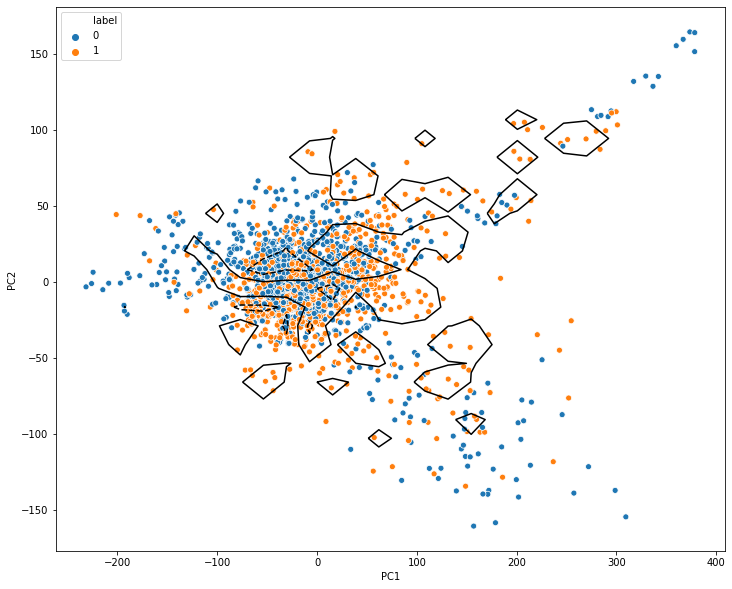

In [22]:
def plot_svm_decision_function(clf):
	"""Plot the decision function for a 2D SVC"""
	x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
	y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
	Y, X = np.meshgrid(y, x)
	P = np.zeros_like(X)
	for i, xi in enumerate(x):
		for j, yj in enumerate(y):
			P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1,-1))
	return plt.contour(X, Y, P, colors='k',
					   levels=[-1, 0, 1],
					   linestyles=['--', '-', '--'])
 
model = SVC(C=4, gamma=0.1, probability=True)
model.fit(train_pca_df,y_train)

plt.figure(figsize=(12,10))
sns.scatterplot(x='PC1', y='PC2', data=train_pca_df, hue=y_train)
plot_svm_decision_function(model)
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

score_auc = cross_val_score(model, train_pca_df, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.6480193252211601
